# Understanding Global COVID-19 Cases


## Import data from John Hopkins CSSE 

In [1]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#Load our data
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

today = len(df.columns)-1
df = df.sort_values(df.columns[today], ascending = False)
df.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20
225,NaN,US,37.0902,-95.7129,1,1,2,2,5,5,...,429052,462780,496535,526396,555313,580619,607670,636350,667801,699706
201,NaN,Spain,40.0000,-4.0000,0,0,0,0,0,0,...,148220,153222,158273,163027,166831,170099,172541,177644,184948,190839
137,NaN,Italy,43.0000,12.0000,0,0,0,0,0,0,...,139422,143626,147577,152271,156363,159516,162488,165155,168941,172434
116,NaN,France,46.2276,2.2137,0,0,2,3,3,3,...,82048,86334,90676,93790,120633,124298,130253,133470,145960,147969
120,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,113296,118181,122171,124908,127854,130072,131359,134753,137698,141397
223,NaN,United Kingdom,55.3781,-3.4360,0,0,0,0,0,0,...,60733,65077,73758,78991,84279,88621,93873,98476,103093,108692
133,NaN,Iran,32.0000,53.0000,0,0,0,0,0,0,...,64586,66220,68192,70029,71686,73303,74877,76389,77995,79494
213,NaN,Turkey,38.9637,35.2433,0,0,0,0,0,0,...,38226,42282,47029,52167,56956,61049,65111,69392,74193,78546
62,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67803,67803,67803,67803,67803,67803,67803,67803,67803,68128
23,NaN,Belgium,50.8333,4.0000,0,0,0,0,0,0,...,23403,24983,26667,28018,29647,30589,31119,33573,34809,36138


## Reformat and sort out provinces

In [2]:
#Sort by most recent day
today = len(df.columns)-1
df_top = df.sort_values(df.columns[today], ascending = False)

df.drop(['Lat','Long'], axis=1,inplace=True)

#-- Reformat
df_top = df_top.T
new_header = df_top.iloc[1] #grab the first row for the header
df_top = df_top[2:] #take the data less the header row
df_top.columns = new_header
#-----

#Top 10
df_top=df_top.iloc[:,0:10]

#Drop China for now
df_top.drop(columns='China',inplace=True)

#find chinese provences
dc1 = df.loc[df['Country/Region'] == 'China']
dc1.drop(['Country/Region'], axis=1,inplace=True)

dc_ex = dc1[dc1['Province/State'] != 'Hubei']
dc1 = dc1.append(dc_ex.sum(numeric_only=True),ignore_index=True)

dc1.at[33, 'Province/State'] = 'china_exl_hubei'

#sum the provinces as append/this is what we need
dc1 = dc1.append(dc1.sum(numeric_only=True),ignore_index=True)
dc1.at[34, 'Province/State'] = 'china_tot'

#This is what we needed
pos_china = dc1.iloc[[0,-1]]
                                          
today = len(dc1.columns)-1
dc_top = dc1.sort_values(dc1.columns[today], ascending = False).T
                     
new_header = dc_top.iloc[0] #grab the first row for the header
dc = dc_top[1:] #take the data less the header row
dc.columns = new_header
#---------
def nans(df): 
    return df[df.isnull().any(axis=1)]

pos_china = dc.reset_index()

pos_china= pos_china.T
new_header = pos_china.iloc[0] #grab the first row for the header
df_ch = pos_china[1:] #take the data less the header row
df_ch.columns = new_header
#df_ch.rename(columns={'Province/State': 'Country/Region','Daily_total':'China'}, inplace=True)
df_ch

df_ch = df_ch.iloc[0]

df = nans(df)
df.drop(['Province/State'], axis=1,inplace=True)

#add china
df = df.append(df_ch,ignore_index=True)

df.at[182, 'Country/Region'] = 'China'

df_top = df.sort_values(df.columns[today], ascending = False)

df10 = df_top.T
new_header = df10.iloc[0] #grab the first row for the header
df_top = df10[1:] #take the data less the header row
df_top.columns = new_header
df_top=df_top.iloc[:,0:10]
#-------
pos=df.sum(axis=0)
pos=pos[1:]

dft = df.T
new_header = dft.iloc[0] #grab the first row for the header
df_t = dft[1:] #take the data less the header row
df_t.columns = new_header

#df_t.reset_index(inplace=True)
df_t.insert(0, 'Worldwide', pos)
#df_t.reset_index(inplace=True)
df = df_t

/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## View global positive cases

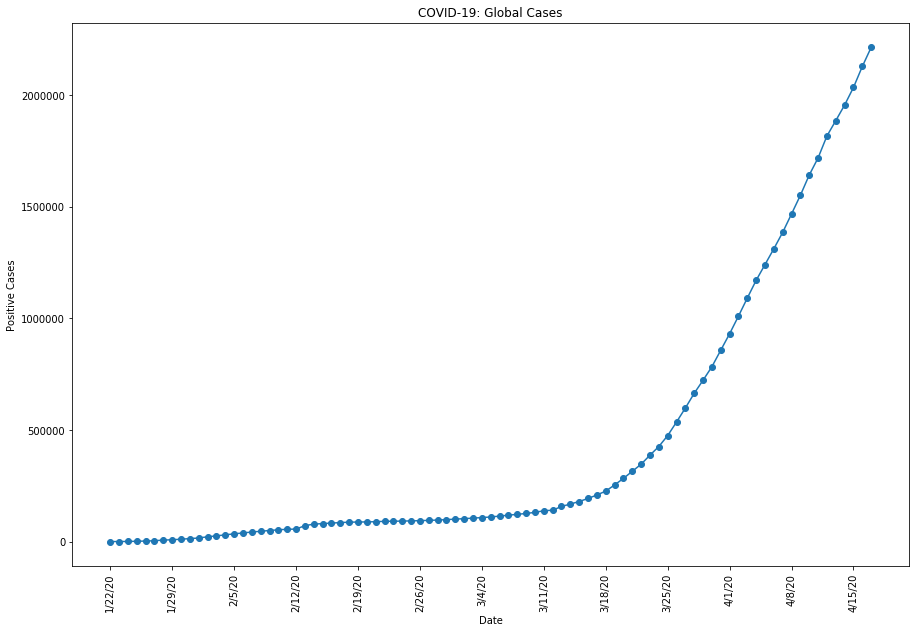

In [3]:
plt.figure(figsize=(15,10))
plt.plot_date(df.index,df.Worldwide,ls='-')

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

plt.title('COVID-19: Global Cases')
plt.ylabel('Positive Cases')
plt.xlabel('Date')

#ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))  
plt.xticks(rotation='vertical')
plt.show()


## Top 10 most infected countries

In [4]:
plt.figure(figsize=(15,10))

df10 = df_top.iloc[:,0:10]
df10 = df10.T['4/17/20']
df10

ax = df10.plot(kind='barh')
ax.invert_yaxis()
plt.show()

Country/Region
US                699706
Spain             190839
Italy             172434
France            147969
Germany           141397
United Kingdom    108692
China              99392
Iran               79494
Turkey             78546
Belgium            36138
Name: 4/17/20, dtype: object

<Figure size 1080x720 with 0 Axes>

## Positive cases by country

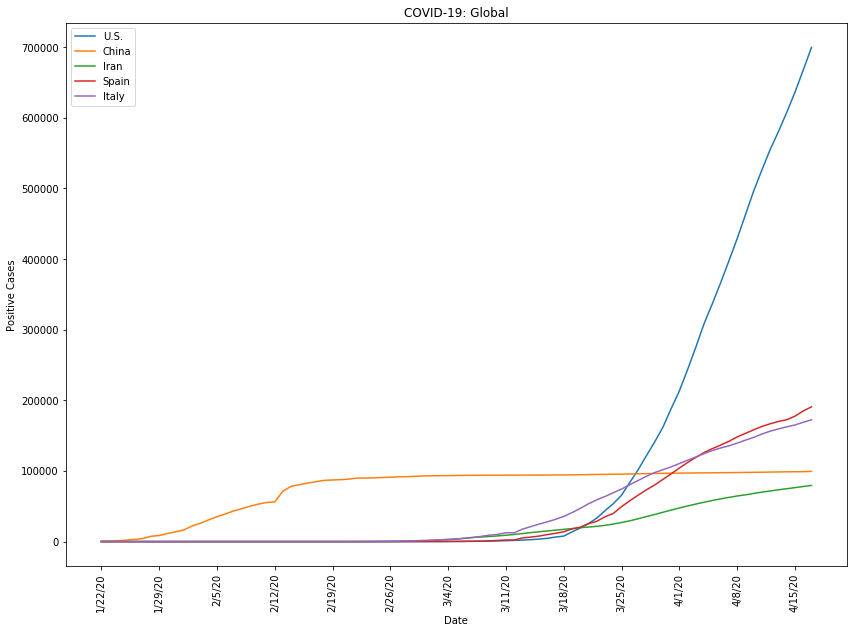

In [5]:
plt.figure(figsize=(14,10))

plt.plot(df.index,df.US)
plt.plot(df.index,df.China)
plt.plot(df.index,df.Iran)
plt.plot(df.index,df.Spain)
plt.plot(df.index,df.Italy)

plt.legend(['U.S.','China','Iran','Spain','Italy'])
plt.title('COVID-19: Global')
plt.ylabel('Positive Cases')
plt.xlabel('Date')
plt.xticks(rotation='vertical')

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))

plt.show()

## Log positive Cases

/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/ericoliverio/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


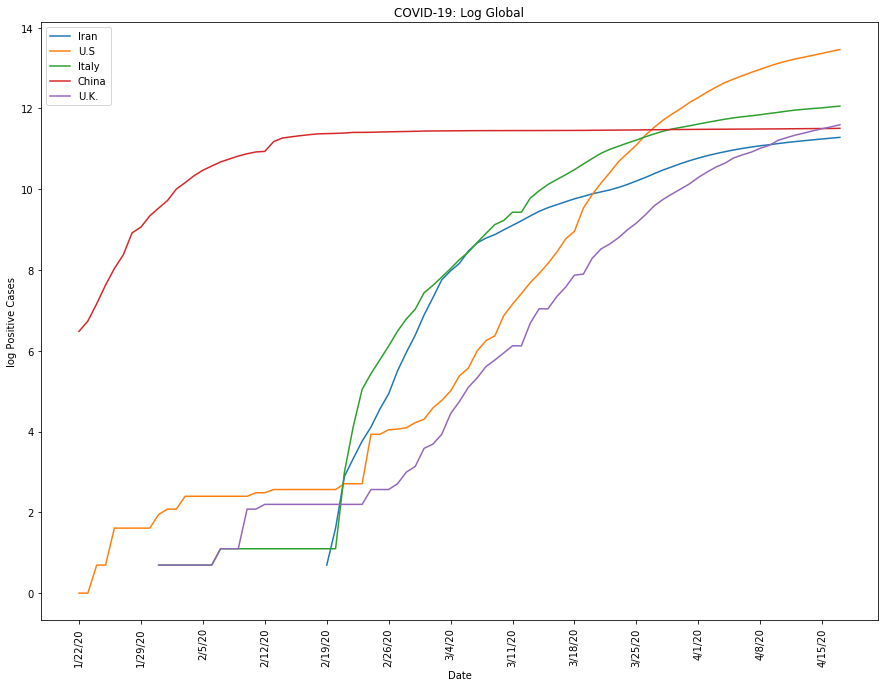

In [6]:
plt.figure(figsize=(15,11))

df = df.astype(float)

plt.plot(df.index,np.log(df.Iran),label='Iran')
plt.plot(df.index,np.log(df.US),label='U.S')
plt.plot(df.index,np.log(df.Italy),label='Italy')
#plt.plot(df.index,np.log(df['Korea, South']),label='South Korea')
plt.plot(df.index,np.log(df.China),label='China')
plt.plot(df.index,np.log(df['United Kingdom']),label='U.K.')
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
plt.title('COVID-19: Log Global')
plt.ylabel('log Positive Cases')
plt.xticks(rotation='vertical')

plt.xlabel('Date')

#plt.axvline('2/20/20',color='b',ls='--')

leg = plt.legend();

## View global daily cases

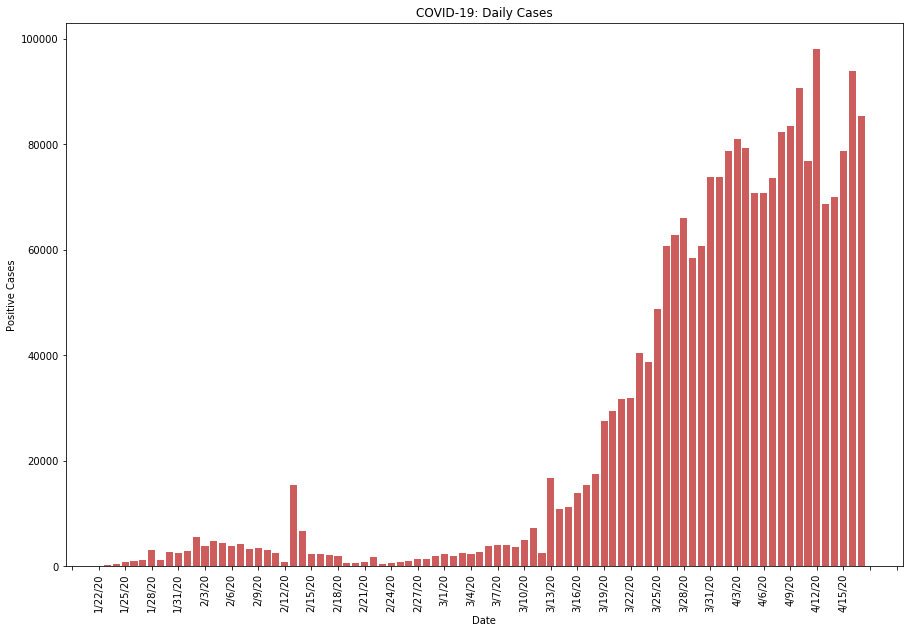

In [7]:
diff = df.diff()

plt.figure(figsize=(15,10))
plt.bar(diff.index, diff['Worldwide'].values,color='indianred')

#ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.title('COVID-19: Daily Cases')
plt.ylabel('Positive Cases')
plt.xlabel('Date')
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3))
plt.show()

## Growth Factor

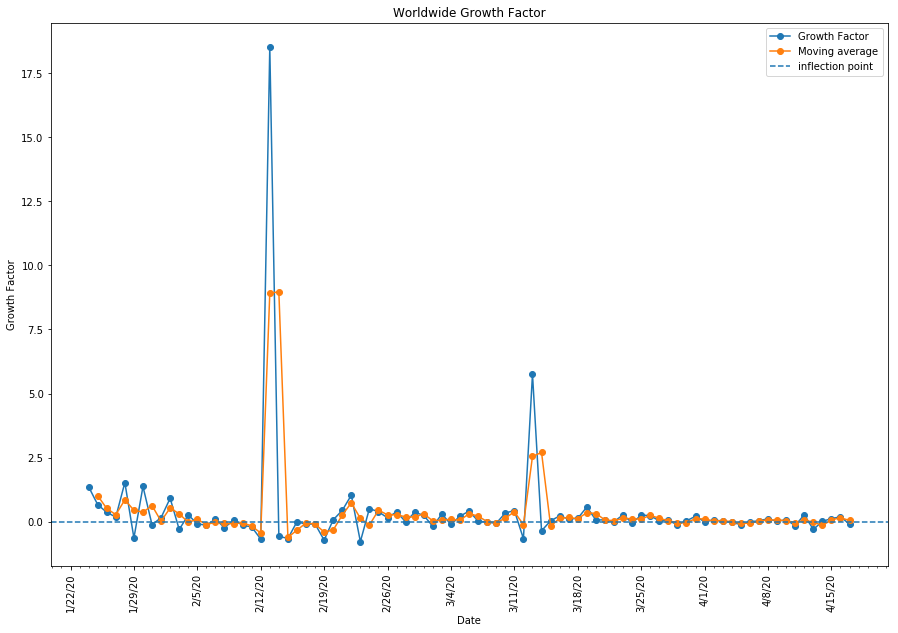

In [8]:
window = 2

country = 'Worldwide' #glo_Positive for sum
diff_st = df.diff()

gf = diff_st.pct_change()
rol = gf.rolling(window).sum()/window

plt.figure(figsize=(15,10))

plt.plot_date(gf.index,gf[country],label='Growth Factor',ls='-')
plt.plot_date(rol.index,rol[country],label='Moving average',ls='-')
#

plt.xticks(rotation='vertical')
plt.title(str(country)+' Growth Factor')
plt.ylabel('Growth Factor')
plt.xlabel('Date')

ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.axhline(0,ls='--',label='inflection point')
leg = plt.legend();
#plt.ylim([-0.5, 1])

plt.show()